# Bab Perkenalan

Nama: Praduta Firman

FTDS : Batch-001

Sumber Dataset : https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study?select=general_data.csv

Tujuan dari studi ini adalah membuat suatu model machine learning yang akan digunakan untuk mengetahui kemungkinan seorang karyawan untuk keluar dari perusahaan.

Data berisikan 3 file: informasi general mengenai tiap karyawan, survey kepada setiap karyawan, survey kepada manager setiap karyawan. Ketiga file ini akan digabungkan dan dianalisa secara bersamaan. Data dapat diambil dari sini

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
df = pd.read_csv('general_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [5]:
df.shape

(4410, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Data Cleaning

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
df.dropna(inplace = True)

Membersihkan missing values

In [12]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Data sudah bersih tidak memiliki missing values

In [13]:
df.drop(columns = ['EmployeeCount','Over18','StandardHours'],inplace=True)

Menghilangkan kolom tidak penting

# Eksplorasi Data

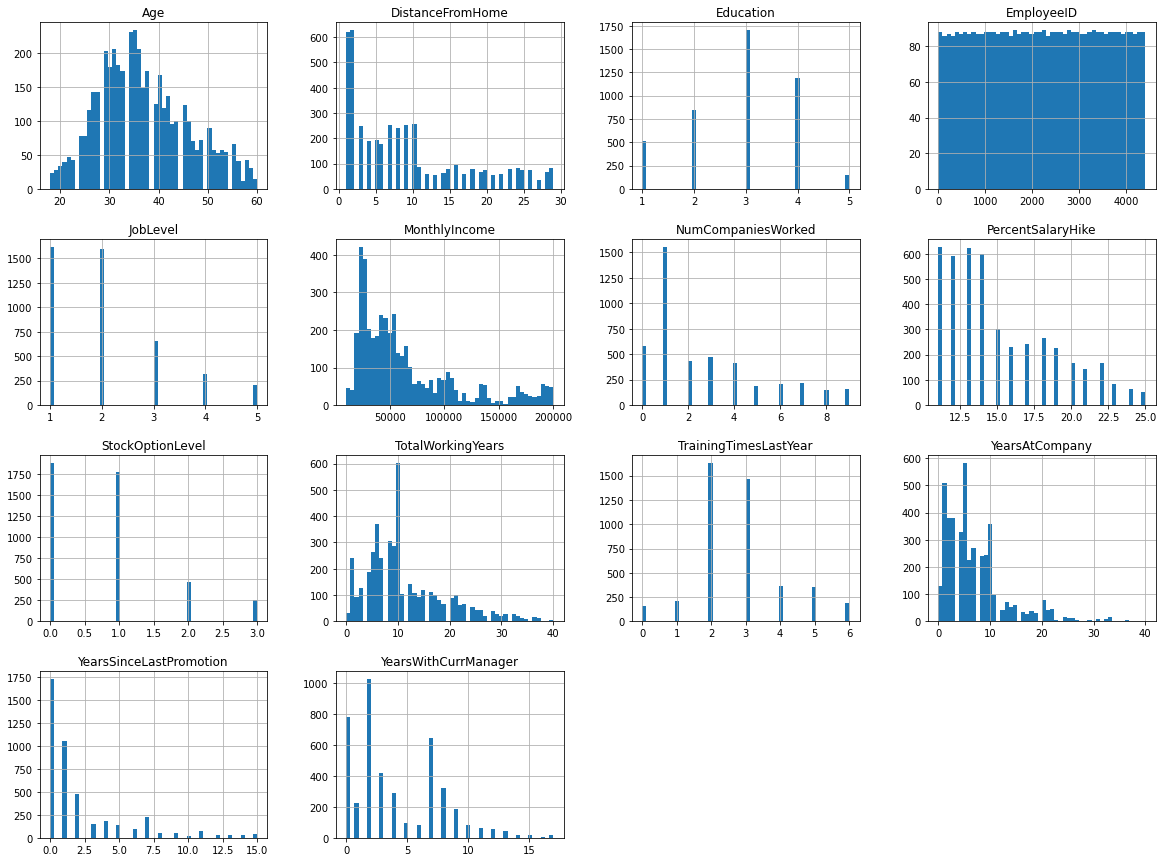

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Data numerik continous

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

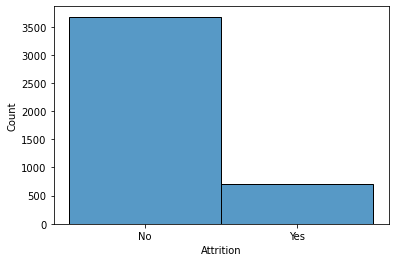

In [16]:
sns.histplot(data=df,x='Attrition')

Data tidak balance

<AxesSubplot:>

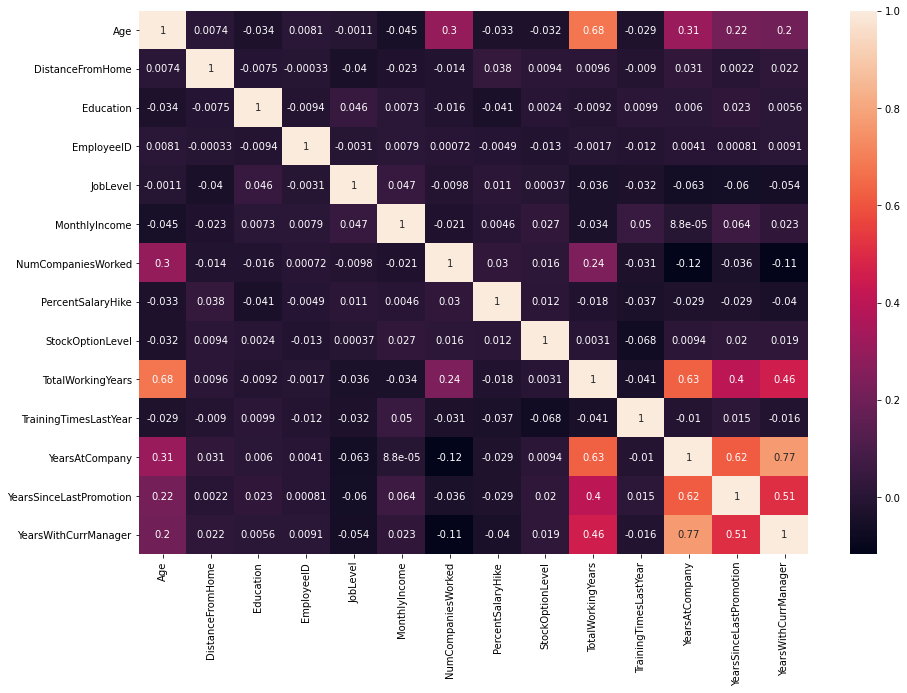

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [21]:
num_dat=df[df.describe().columns.values]
cat_dat=df.drop(columns=df.describe().columns.values)

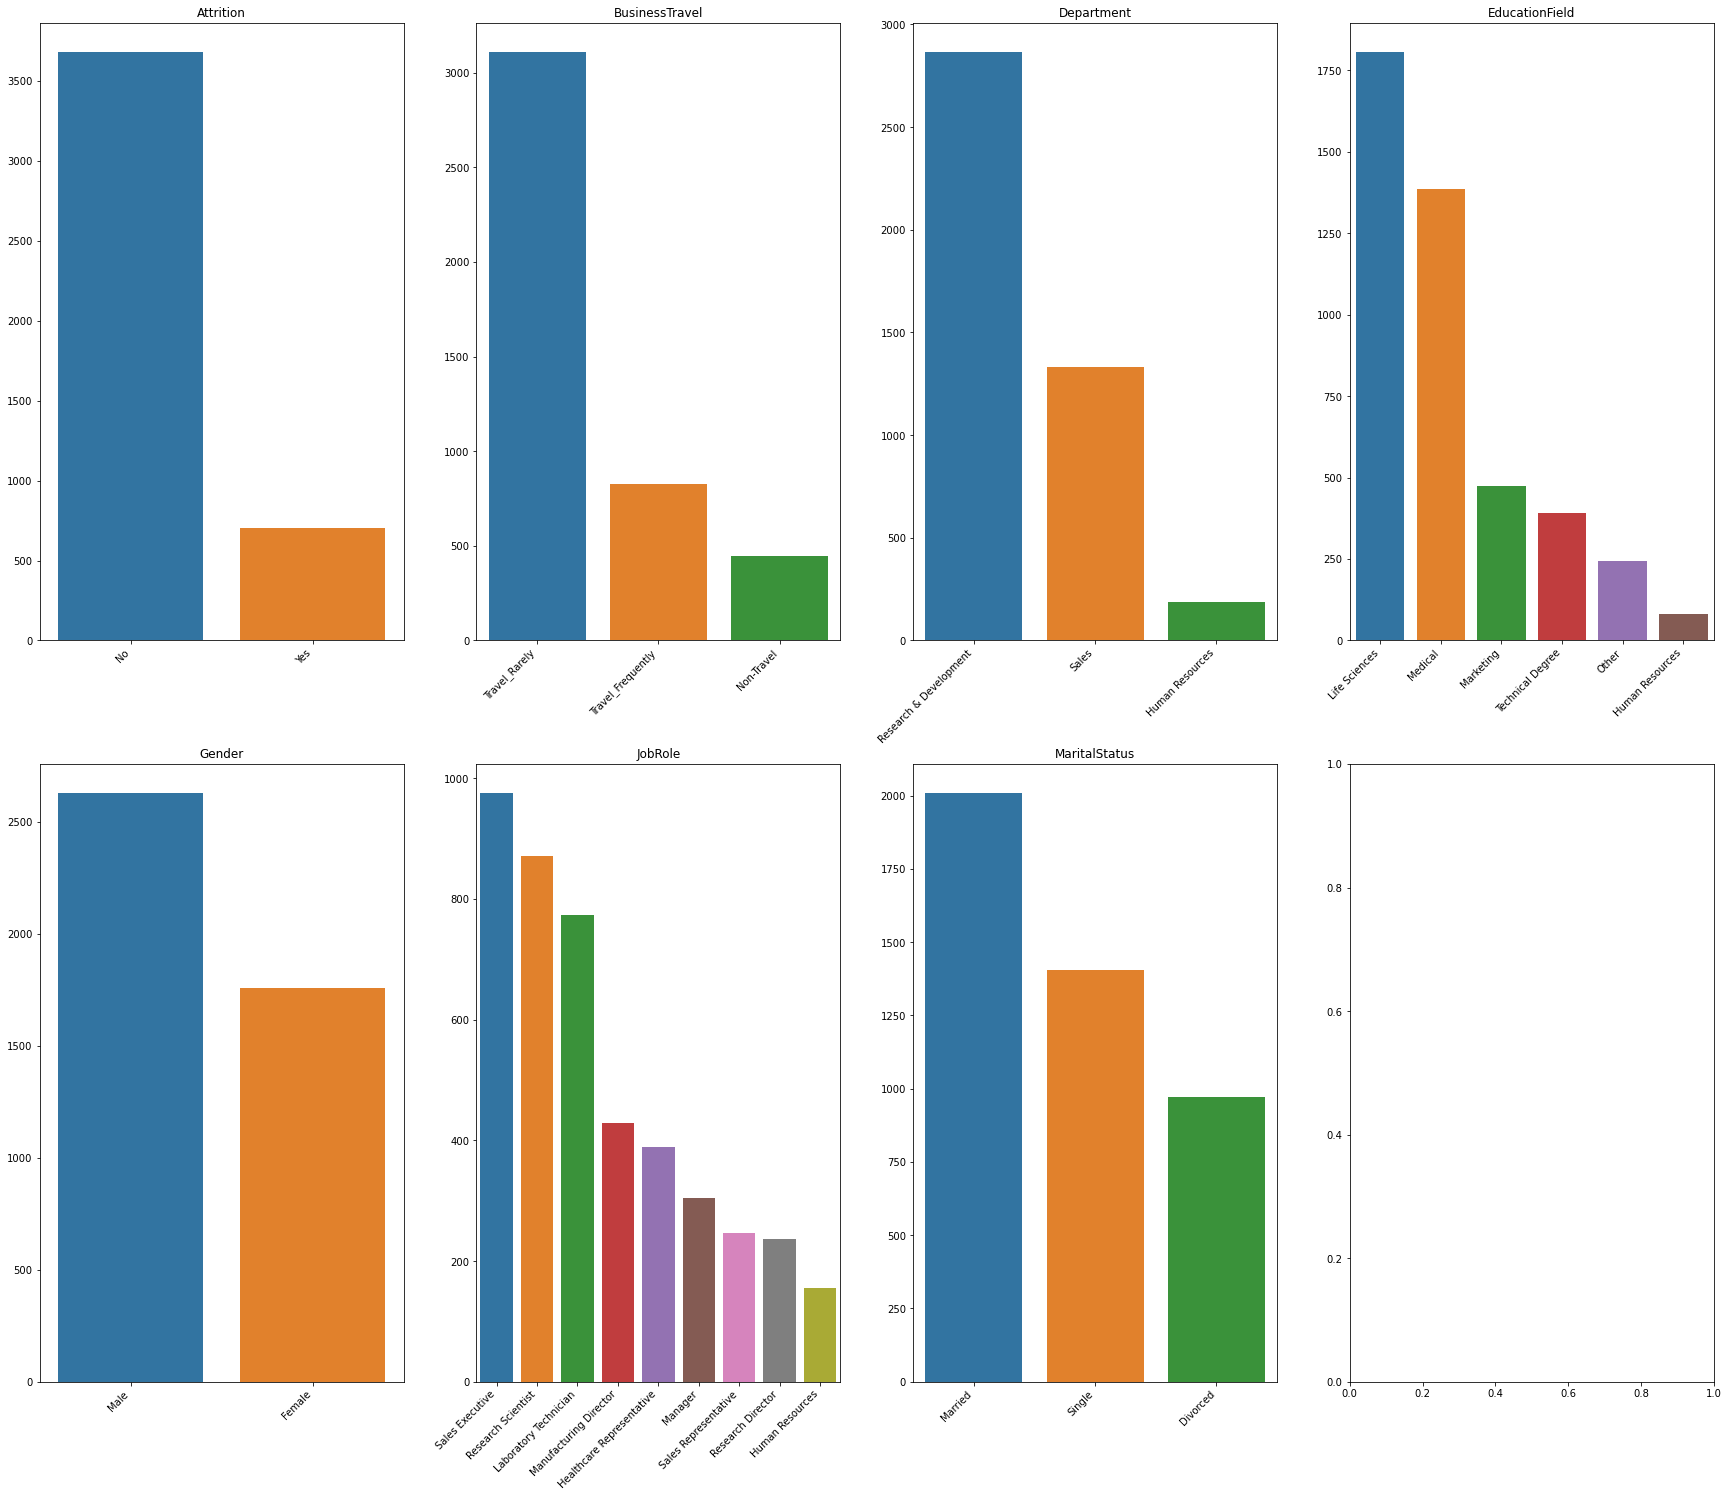

In [24]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(30,25))
i=0
j=0

for col in cat_dat.columns:
    val=cat_dat[col].value_counts()
    sns.barplot(x=val.index, y=val.values, ax=axes[i][j])
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=45, ha='right')
    axes[i][j].set_title(col)
    j+=1
    if j>3:
        i+=1
        j=0

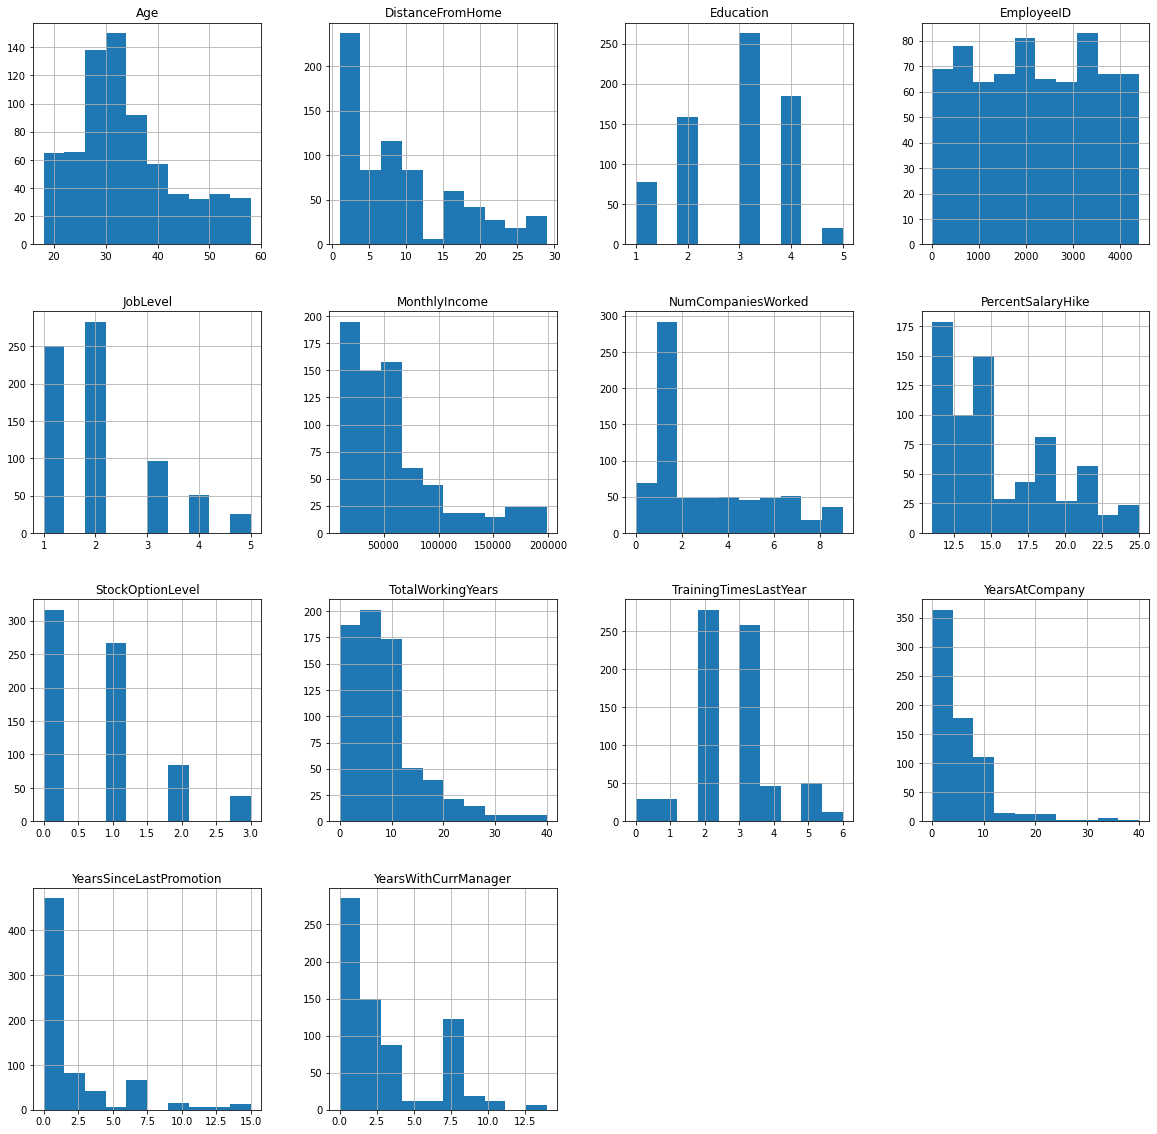

In [25]:
df.loc[df['Attrition']=='Yes'].hist(figsize=(20,20))
plt.show()

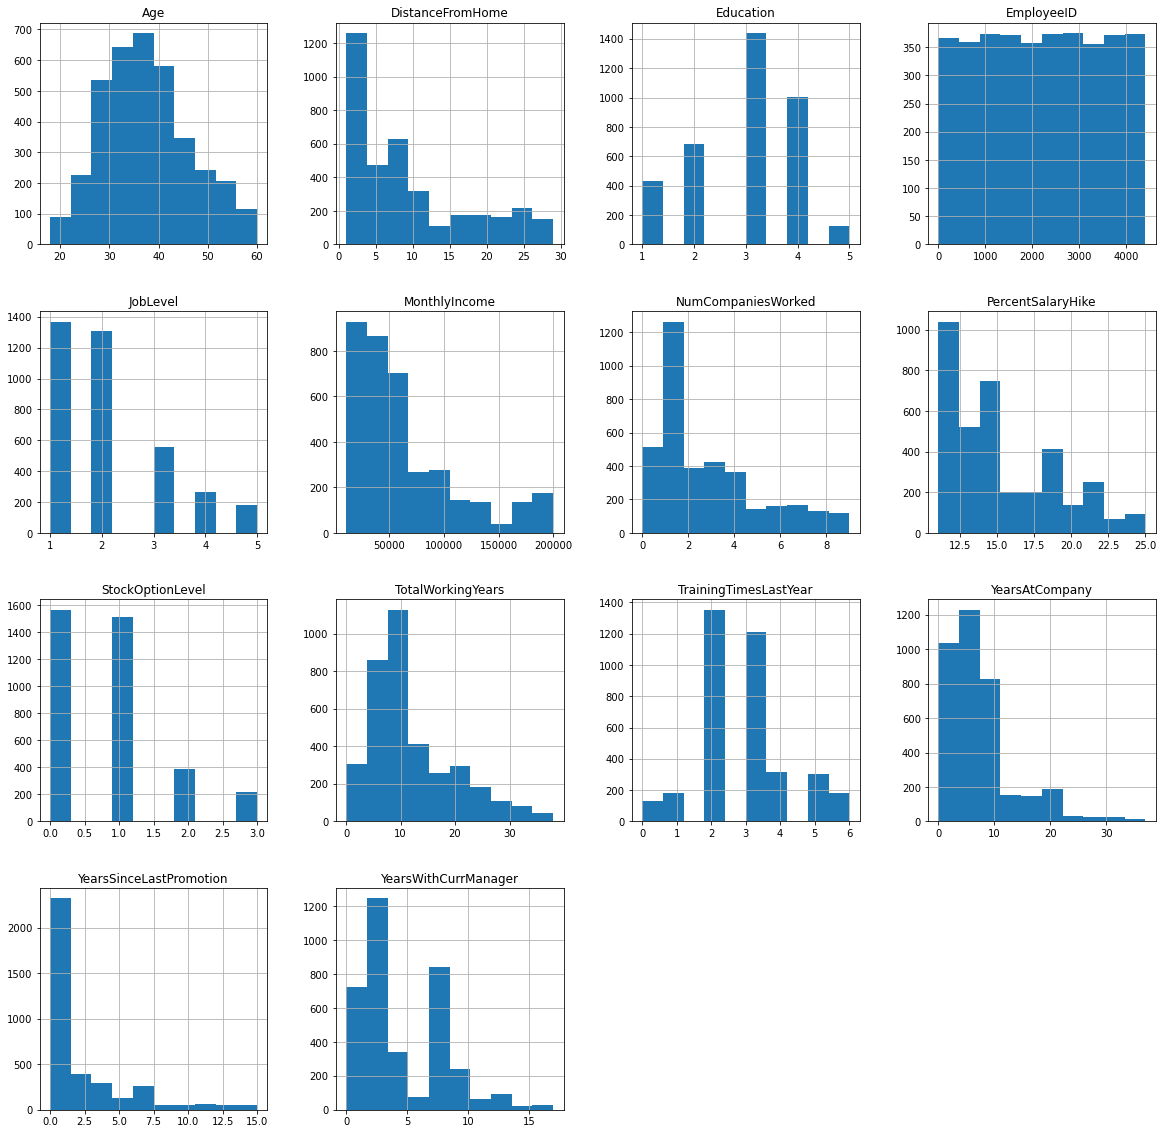

In [26]:
df.loc[df['Attrition']=='No'].hist(figsize=(20,20))
plt.show()

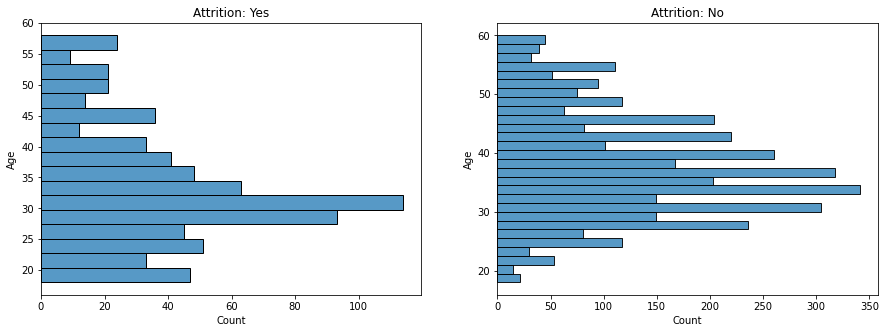

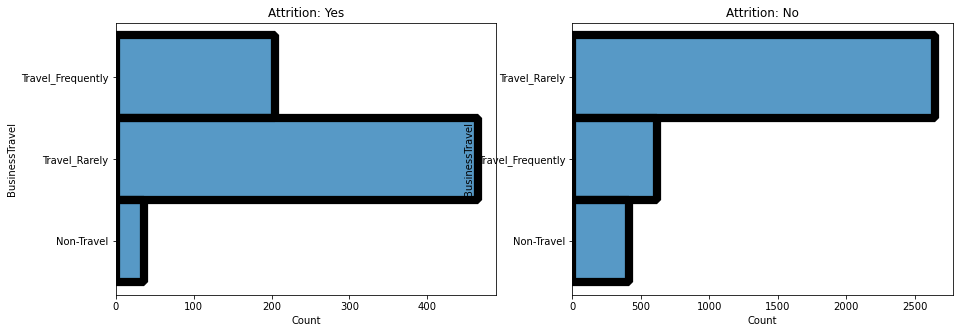

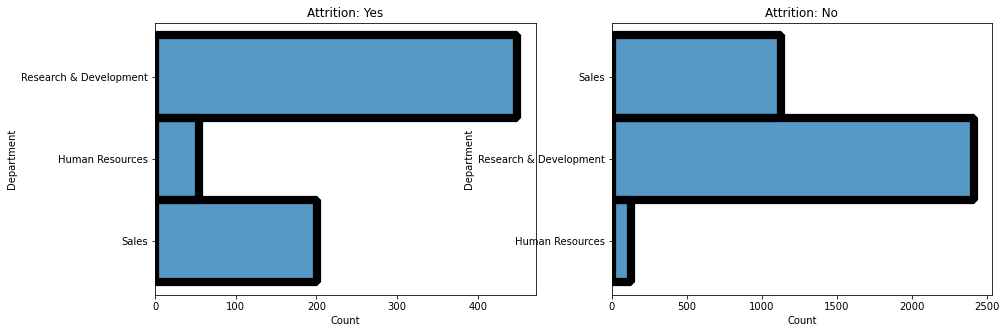

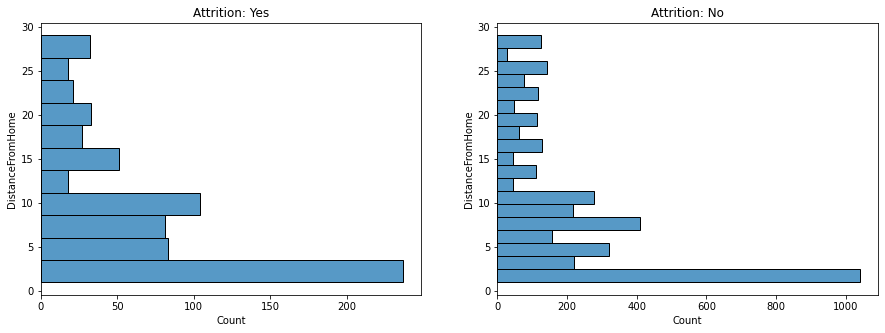

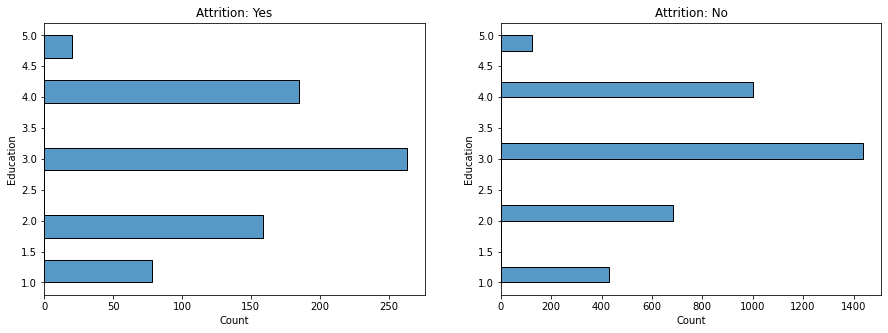

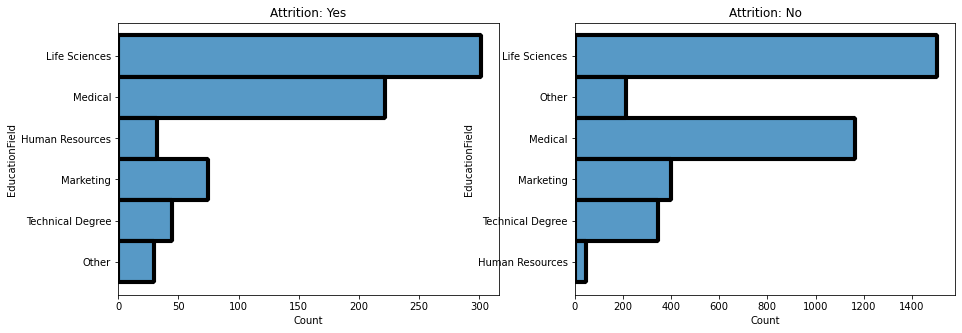

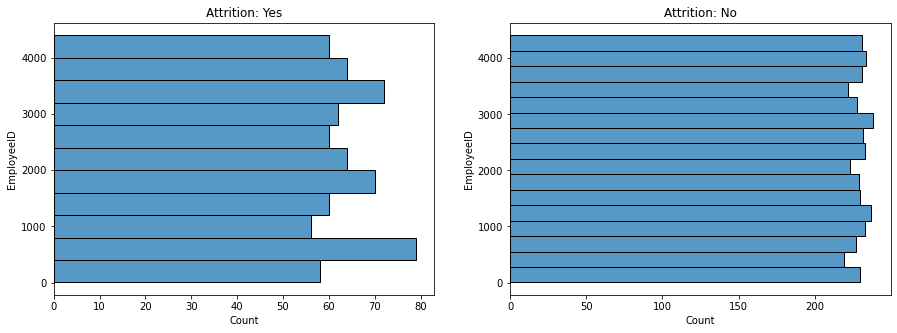

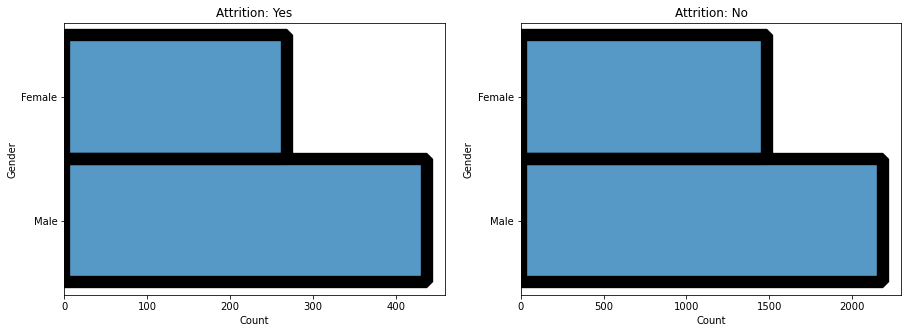

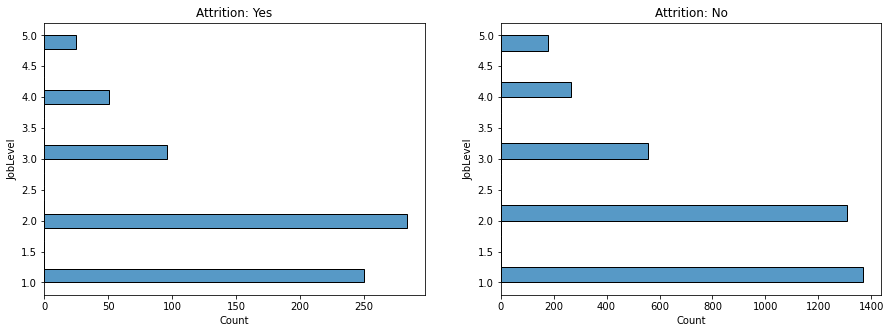

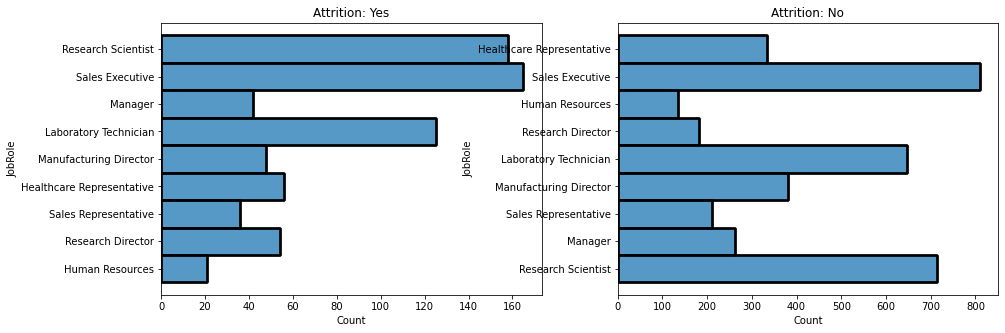

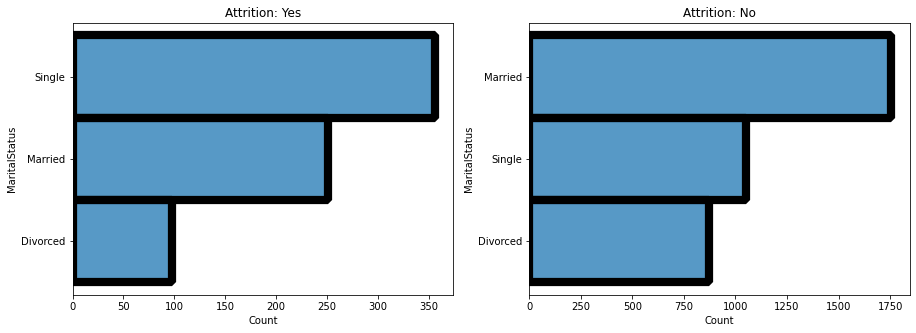

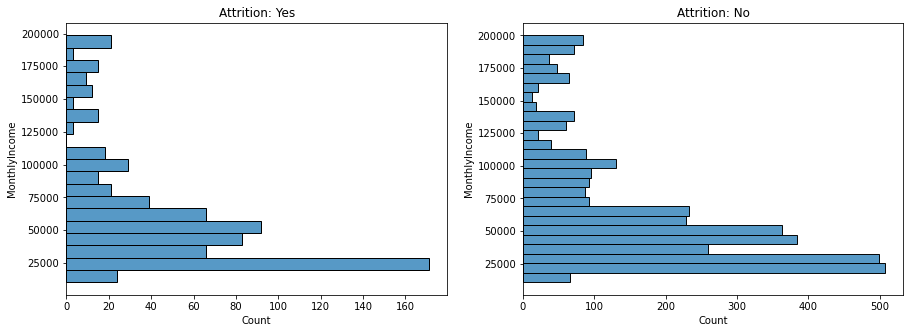

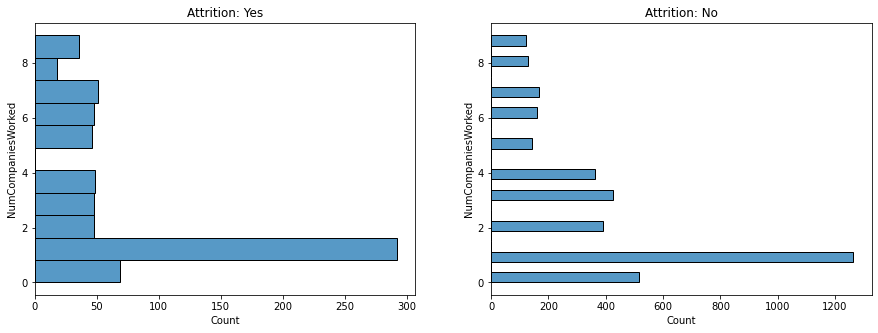

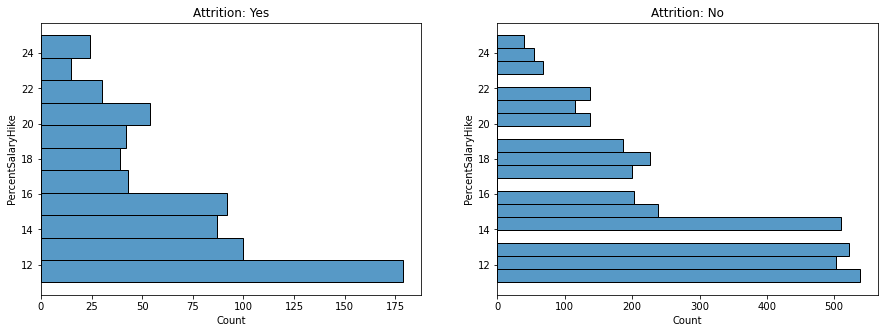

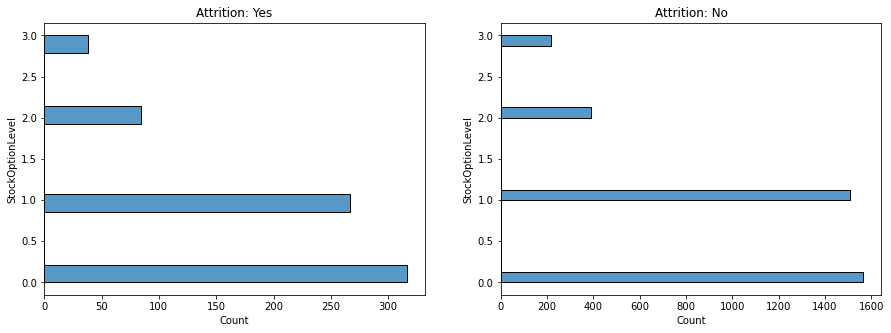

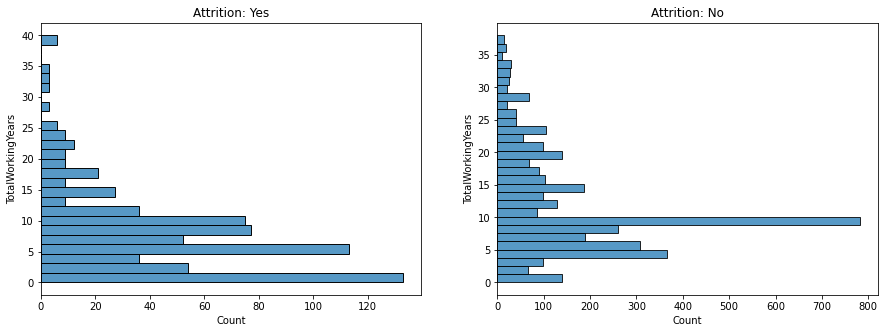

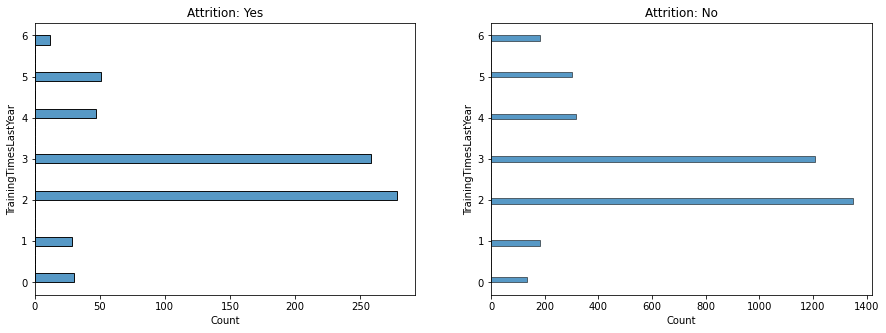

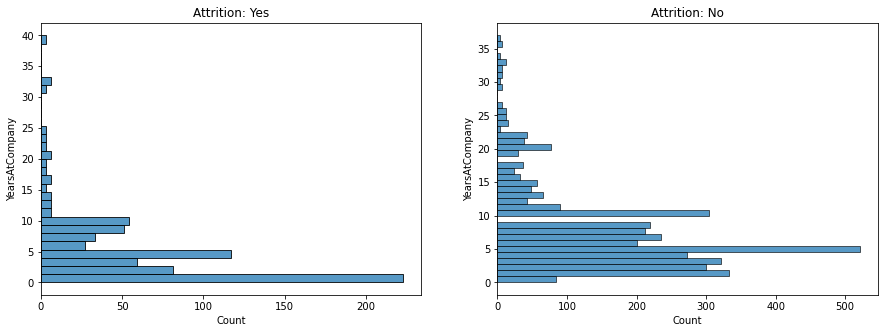

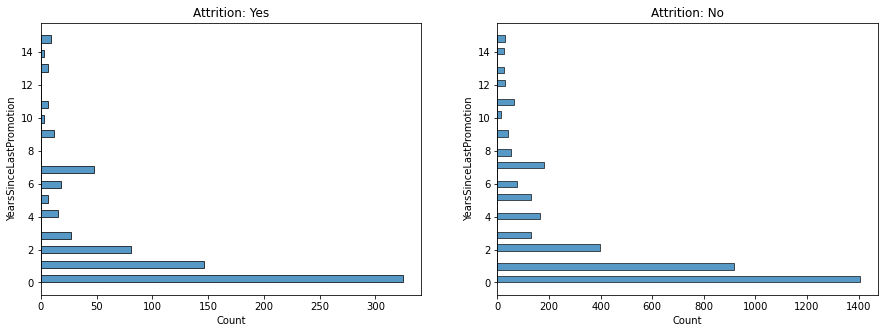

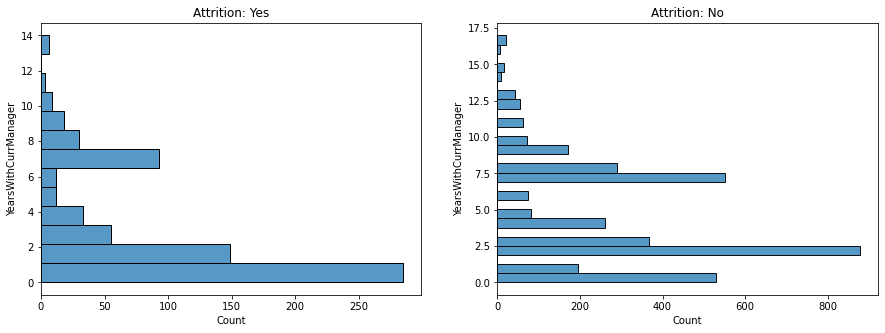

In [27]:
for col in df.columns:
    if col == 'Attrition' or col.endswith('num'):
        continue
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    
    sns.histplot(data=df.loc[df['Attrition']=='Yes'],y=col, ax=ax1).set_title('Attrition: Yes')
    sns.histplot(data=df.loc[df['Attrition']=='No'],y=col, ax=ax2).set_title('Attrition: No')

In [28]:
df.groupby('Attrition').mean()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,
No,37.567038,9.232527,2.920044,2210.377482,2.069894,65684.209954,2.646451,15.157465,0.797661,11.868643,2.825129,7.367419,2.236062,4.367963
Yes,33.628369,9.024113,2.872340,2194.387234,2.032624,61814.950355,2.937589,15.487943,0.778723,8.273759,2.658156,5.148936,1.960284,2.865248


EDA Analysisi :
- Banyak dari mereka yang masih muda , belum bepengalaman, dan tidak puas dengan perusahaan dan lingkungan kerjanya tersebut.

# Feature Engineering

<AxesSubplot:>

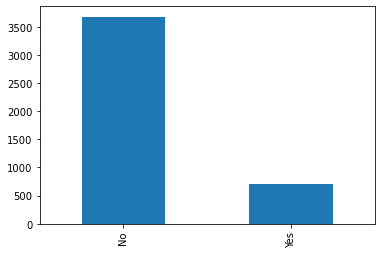

In [31]:
df.Attrition.value_counts().plot(kind='bar')

In [32]:
df.Attrition.value_counts()

No     3677
Yes     705
Name: Attrition, dtype: int64

In [51]:
df['Attrition'].replace({'No': 0, 'Yes': 1},inplace = True)

# Data Preprocessing

In [33]:
X=df.drop(columns='Attrition')
y=df['Attrition']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.08 ,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.22  ,stratify=y_train)

# Pipeline

In [41]:
coltrans = make_column_transformer(
(OneHotEncoder(),['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']),
(StandardScaler(),['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked',
                  'PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
                 'YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction',
                  'WorkLifeBalance','JobInvolvement','PerformanceRating'])
)